In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import random
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPolygon, LineString
from shapely.ops import unary_union
from shapely import wkt
from geopy.geocoders import Nominatim
from google.colab import files
import requests
import warnings
import re
from IPython.display import display
import seaborn as sns
import networkx as nx
warnings.filterwarnings("ignore")
# ox.config(use_cache=True)

# COBA


In [ ]:
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

ox.settings.log_console = True
ox.settings.use_cache = True

place_name = "Jakarta Pusat, Indonesia"


In [ ]:
G_poi = ox.graph_from_place(place_name, network_type="drive", simplify= False)

In [ ]:
# ox.plot_graph(G_poi, figsize = (10,10), node_size=5, edge_color="gray")

# Turn Graph into GeoDataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_poi)

In [ ]:
# Save gdf_nodes to a CSV file
gdf_nodes.to_csv('road_nodes.csv', index=True)

# Save gdf_edges to a CSV file
gdf_edges.to_csv('road_edges.csv', index=True)

print("Road network data saved to 'road_nodes.csv' and 'road_edges.csv'")

Road network data saved to 'road_nodes.csv' and 'road_edges.csv'


In [ ]:
# # Example: check if a graph is a MultiDiGraph
# # if isinstance(G_poi, nx.MultiDiGraph):
#     print("This is a MultiDiGraph (allows multiple directed edges).")
# else:
#     print("This is NOT a MultiDiGraph.")

This is a MultiDiGraph (allows multiple directed edges).


In [ ]:
display(gdf_nodes.head())
display(gdf_edges.head())
display(gdf_nodes.info())
display(gdf_edges.info())

y           x  street_count highway railway  ref  \
osmid                                                               
29938968 -6.180400  106.823088             2     NaN     NaN  NaN   
29938969 -6.180894  106.823052             3     NaN     NaN  NaN   
29938971 -6.180667  106.822544             2     NaN     NaN  NaN   
29938972 -6.180623  106.823184             2     NaN     NaN  NaN   
29938988 -6.182890  106.829799             3     NaN     NaN  NaN   

                            geometry  
osmid                                 
29938968   POINT (106.82309 -6.1804)  
29938969  POINT (106.82305 -6.18089)  
29938971  POINT (106.82254 -6.18067)  
29938972  POINT (106.82318 -6.18062)  
29938988   POINT (106.8298 -6.18289)

osmid  highway  junction lanes  oneway  \
u        v           key                                                
29938968 5374310750  0    1092811622  primary  circular     3   False   
         4548266807  0    1092811622  primary  circular     3   False   
29938969 4269900340  0    1252511139  primary  circular     3   False   
         7114857570  0    1252511139  primary  circular     3   False   
         12684680483 0    1263664035  primary       NaN     3    True   

                          reversed    length                          name  \
u        v           key                                                     
29938968 5374310750  0       False  3.106217                           NaN   
         4548266807  0        True  4.258422                           NaN   
29938969 4269900340  0       False  6.097096                           NaN   
         7114857570  0        True  6.192957                           NaN   
         12684680483 0       False  8.006809  Jalan Mohammad Husni Thamrin   

                         width est_width maxspeed access bridge  ref tunnel  \
u        v           key                                                      
29938968 5374310750  0     NaN       NaN      NaN    NaN    NaN  NaN    NaN   
         4548266807  0     NaN       NaN      NaN    NaN    NaN  NaN    NaN   
29938969 4269900340  0     NaN       NaN      NaN    NaN    NaN  NaN    NaN   
         7114857570  0     NaN       NaN      NaN    NaN    NaN  NaN    NaN   
         12684680483 0    16.7       NaN      NaN    NaN    NaN  NaN    NaN   

                                                                   geometry  
u        v           key                                                     
29938968 5374310750  0    LINESTRING (106.82309 -6.1804, 106.8231 -6.18042)  
         4548266807  0    LINESTRING (106.82309 -6.1804, 106.82306 -6.18...  
29938969 4269900340  0    LINESTRING (106.82305 -6.18089, 106.823 -6.18092)  
         7114857570  0    LINESTRING (106.82305 -6.18089, 106.82309 -6.1...  
         12684680483 0    LINESTRING (106.82305 -6.18089, 106.82305 -6.1...

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 28797 entries, 29938968 to 12923326453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   y             28797 non-null  float64 
 1   x             28797 non-null  float64 
 2   street_count  28797 non-null  int64   
 3   highway       977 non-null    object  
 4   railway       64 non-null     object  
 5   ref           16 non-null     object  
 6   geometry      28797 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 1.8+ MB


None

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 49211 entries, (29938968, 5374310750, 0) to (12923326453, 7102239343, 0)
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   osmid      49211 non-null  int64   
 1   highway    49211 non-null  object  
 2   junction   288 non-null    object  
 3   lanes      42741 non-null  object  
 4   oneway     49211 non-null  bool    
 5   reversed   49211 non-null  bool    
 6   length     49211 non-null  float64 
 7   name       39227 non-null  object  
 8   width      39530 non-null  object  
 9   est_width  2530 non-null   object  
 10  maxspeed   738 non-null    object  
 11  access     2906 non-null   object  
 12  bridge     612 non-null    object  
 13  ref        309 non-null    object  
 14  tunnel     51 non-null     object  
 15  geometry   49211 non-null  geometry
dtypes: bool(2), float64(1), geometry(1), int64(1), object(11)
memory usage: 8.0+ MB


None

In [ ]:
tags = {
    'amenity': [
        'school', 'college', 'university', 'library', 'fast_food', 'cafe', 'restaurant',
        'bus_station', 'bus_stop'
    ],
    "highway": ["bus_stop"],
    "railway": ["station"],
    'building': ['university'],
    'education': ['university'],
    'shop': ['mall', 'convenience', 'supermarket', 'department_store'],
    'public_transport': ['platform', 'stop_position', 'station'],
}

# tag values you do NOT want to limit
UNLIMITED_TAGS = {'college', 'university', 'cafe', 'restaurant', 'mall', 'bus_stop', 'station'}

In [ ]:
geometries_features_from_place = ox.features_from_place(place_name, tags = tags)
# display(geometries_features_from_place.info())
# display(geometries_features_from_place.head())

In [ ]:
def fetch_geospatial_data(place_name, tags, unlimited_tags):
    all_data = pd.DataFrame()

    for tag_category, tag_values in tags.items():
        for tag_value in tag_values:
            try:
                gdf = ox.features_from_place(place_name, tags={tag_category: tag_value})
                if not gdf.empty:
                    data = gdf[['geometry', 'name']].copy()
                    data['category'] = tag_category
                    data['tag'] = tag_value

                    # Extract lat/lon
                    data['latitude'] = data.geometry.apply(
                        lambda geom: geom.y if geom.geom_type == 'Point' else geom.centroid.y)
                    data['longitude'] = data.geometry.apply(
                        lambda geom: geom.x if geom.geom_type == 'Point' else geom.centroid.x)

                    # Drop rows with NaN or empty names
                    data = data.dropna(subset=['name'])
                    data = data[data['name'].str.strip() != '']

                    # Limit rows only if the tag_value is NOT in unlimited_tags
                    if tag_value not in unlimited_tags:
                        data = data.head(10)

                    data = data.drop('geometry', axis=1)
                    all_data = pd.concat([all_data, data], ignore_index=True)

            except Exception as e:
                print(f"Error fetching data for {tag_category}='{tag_value}': {e}")

    return all_data

data = fetch_geospatial_data(place_name, tags, UNLIMITED_TAGS)
display(data)
data.to_csv('poi_places.csv', index=False)

Error fetching data for amenity='bus_stop': No matching features. Check query location, tags, and log.
Error fetching data for education='university': No matching features. Check query location, tags, and log.


name          category      tag  latitude  \
0                    SD Bendungan Hilir           amenity   school -6.213519   
1     Sekolah Kristen Calvin SD-SMP-SMA           amenity   school -6.152846   
2                SD Negeri Kramat 08/09           amenity   school -6.187656   
3            SMP Muhammadiyah 2 Jakarta           amenity   school -6.161463   
4                   MAN 3 JAKARTA PUSAT           amenity   school -6.184604   
...                                 ...               ...      ...       ...   
1067                Terminal Bis Gambir  public_transport  station -6.176548   
1068                        Halte Galur  public_transport  station -6.174414   
1069                Halte Pasar Genjing  public_transport  station -6.194444   
1070                    Halte Utan Kayu  public_transport  station -6.192748   
1071                 Halte Pramuka Sari  public_transport  station -6.192231   

       longitude  
0     106.811434  
1     106.842974  
2     106.847226  
3     106.842676  
4     106.872764  
...          ...  
1067  106.830105  
1068  106.854703  
1069  106.860922  
1070  106.864551  
1071  106.868570  

[1072 rows x 5 columns]

In [ ]:
# #clean data tempat tanpa nama
# # Hapus NaN
# data = data.dropna(subset=['name'])

# # Hapus nama yang cuma kosong doang
# data = data[data['name'].str.strip() != '']


In [ ]:
# data.to_csv('building.csv', index=False)

In [ ]:
import folium

def visualize_locations_map(df, zoom_start=14, color='blue'):

    if df.empty:
        raise ValueError("The DataFrame is empty.")

    # Center map
    center_lat = df['latitude'].mean()
    center_lon = df['longitude'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_start)

    # Add markers
    for _, row in df.iterrows():
        lat = row['latitude']
        lon = row['longitude']
        popup_text = (
            f"<b>Nama</b>: {row['name']}<br>"
            f"<b>Category</b>: {row['category']}<br>"
            f"<b>Tag</b>: {row['tag']}<br>"
            f"<b>Latitude</b>: {lat}<br>"
            f"<b>Longitude</b>: {lon}<br>"
            f"<a href='https://www.google.com/maps?q={lat},{lon}' target='_blank'>Open in Google Maps</a>"
        )

        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_text, max_width=250),
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(m)

    return m

In [ ]:
visualize_locations_map(data)

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Buka data gedung
data = pd.read_csv('poi_places.csv')

# Buat GeoDataFrame
gedung_gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['longitude'], data['latitude']),
    crs='EPSG:4326'
)

In [ ]:
gedung_gdf = gedung_gdf.to_crs(gdf_nodes.crs)

In [ ]:
import osmnx as ox

gedung_gdf['nearest_node'] = gedung_gdf.geometry.apply(
    lambda point: ox.distance.nearest_nodes(G_poi, point.x, point.y)
)

In [ ]:
from geopy.distance import geodesic
import networkx as nx

for idx, row in gedung_gdf.iterrows():
    gedung_node = f"gedung_{idx}"  # ID unik
    G_poi.add_node(gedung_node, x=row.geometry.x, y=row.geometry.y)

    jalan_node = row['nearest_node']

    # Hitung jarak aktual
    gedung_coord = (row.geometry.y, row.geometry.x)
    jalan_coord = (G_poi.nodes[jalan_node]['y'], G_poi.nodes[jalan_node]['x'])
    jarak = geodesic(gedung_coord, jalan_coord).meters

    G_poi.add_edge(gedung_node, jalan_node, length=jarak)
    G_poi.add_edge(jalan_node, gedung_node, length=jarak)


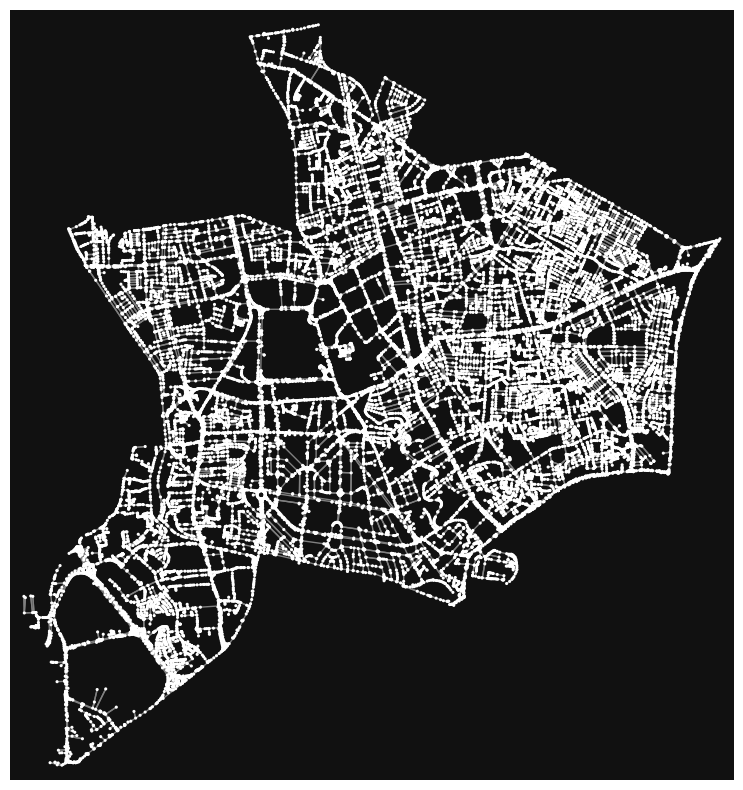

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(G_poi, figsize=(10, 10), node_size=5, edge_color="gray")


NYOBA SHORTEST PATH

In [ ]:
# 1. Load CSVs and convert WKT geometry
df_nodes = pd.read_csv('road_nodes.csv')
df_nodes['geometry'] = df_nodes['geometry'].apply(wkt.loads)
gdf_nodes = gpd.GeoDataFrame(df_nodes, geometry='geometry', crs="EPSG:4326")

df_edges = pd.read_csv('road_edges.csv')
df_edges['geometry'] = df_edges['geometry'].apply(wkt.loads)
gdf_edges = gpd.GeoDataFrame(df_edges, geometry='geometry', crs="EPSG:4326")

# Use the existing data variable instead of loading building.csv
gdf_bld = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.longitude, data.latitude),
    crs="EPSG:4326"
)

gdf_bld.to_csv("gdf_bld.csv", index=False)


In [ ]:
# 2. Build graph
G = nx.Graph()

# Add road nodes
for idx, row in gdf_nodes.iterrows():
    G.add_node(row['osmid'], x=row.geometry.x, y=row.geometry.y)

# Add building nodes
for idx, row in gdf_bld.iterrows():
    nid = f"bldg_{idx}"
    G.add_node(nid, x=row.geometry.x, y=row.geometry.y, name=row['name'])

# Add road edges (weight = length)
for idx, row in gdf_edges.iterrows():
    u, v = row['u'], row['v']
    length = row['length']
    if pd.notna(length):
        G.add_edge(u, v, length=length)

# Haversine for accurate meters
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c = 2*math.asin(math.sqrt(a))
    return 6371000 * c  # meters

# Prepare road node coords list
road_nodes_list = [(n, data['y'], data['x']) for n, data in G.nodes(data=True) if isinstance(n, (int, float))]

# Connect buildings to nearest road node
for idx, row in gdf_bld.iterrows():
    bnode = f"bldg_{idx}"
    b_lat, b_lon = row.latitude, row.longitude
    nearest, dist = min(
        road_nodes_list,
        key=lambda item: haversine(b_lat, b_lon, item[1], item[2])
    )[0], None
    # Compute exact dist
    dist = haversine(b_lat, b_lon, G.nodes[nearest]['y'], G.nodes[nearest]['x'])
    G.add_edge(bnode, nearest, length=dist)
    G.add_edge(nearest, bnode, length=dist)

In [ ]:
def get_building_node_id_by_name(name):
    """Return the node ID (e.g., bldg_7) for a given building name."""
    match = gdf_bld[gdf_bld['name'].str.lower().str.strip() == name.lower().strip()]
    if not match.empty:
        idx = match.index[0]
        return f"bldg_{idx}"
    else:
        raise ValueError(f"Building name '{name}' not found in gdf_bld")


 Mau dari Mana? Halte Utan Kayu
Mau Ke Mana? Halte Pramuka Sari


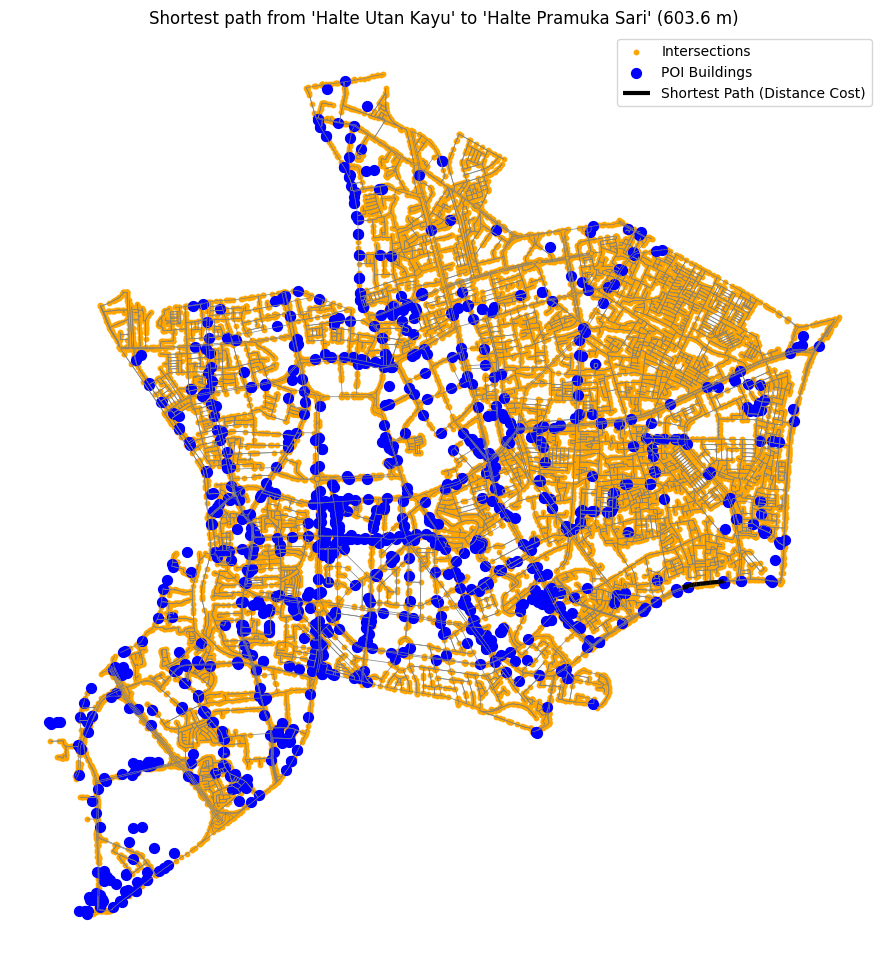

Route: [('bldg_1070', 12317255661), (12317255661, 4275299260), (4275299260, 4275299216), (4275299216, 4275299261), (4275299261, 316412952), (316412952, 12317255660), (12317255660, 5374801881), (5374801881, 4758806165), (4758806165, 7015319480), (7015319480, 5374805029), (5374805029, 5374804816), (5374804816, 5374805021), (5374805021, 316412951), (316412951, 329007691), (329007691, 2203385953), (2203385953, 5374801876), (5374801876, 4990696915), (4990696915, 12317255676), (12317255676, 11746746446), (11746746446, 5128719888), (5128719888, 'bldg_1071')]
Total distance: 603.59 meters


In [ ]:
# 3. Shortest path between first two buildings
# Example names from your CSV
src_name = input("Mau dari Mana? ")
dst_name = input("Mau Ke Mana? ")

# Lookup node IDs from names
src = get_building_node_id_by_name(src_name)
dst = get_building_node_id_by_name(dst_name)

path = nx.dijkstra_path(G, source=src, target=dst, weight='length')
path_edges = list(zip(path, path[1:]))
total_dist = nx.shortest_path_length(G, source=src, target=dst, weight='length')

# Build GeoDataFrame for path edges
lines = []
for u, v in path_edges:
    x1, y1 = G.nodes[u]['x'], G.nodes[u]['y']
    x2, y2 = G.nodes[v]['x'], G.nodes[v]['y']
    lines.append(LineString([(x1, y1), (x2, y2)]))
gdf_path = gpd.GeoDataFrame(geometry=lines, crs="EPSG:4326")

# 4. Plot
ax = gdf_edges.plot(figsize=(12,12), linewidth=0.5, edgecolor='gray')
gdf_nodes.plot(ax=ax, markersize=10, color='orange', marker = 'o', label = 'Intersections')
gdf_bld.plot(ax=ax, markersize=50, color='blue', marker='o', label='POI Buildings')
gdf_path.plot(ax=ax, linewidth=3, color='black', label='Shortest Path (Distance Cost)')

plt.legend()
plt.title(f"Shortest path from '{src_name}' to '{dst_name}' ({total_dist:.1f} m)")
plt.axis('off')
plt.show()

# Print route details
print("Route:", path_edges)
print(f"Total distance: {total_dist:.2f} meters")

In [ ]:
rail_filter = '["railway"]'

G_train = ox.graph_from_place(place_name, custom_filter=rail_filter, network_type='all')


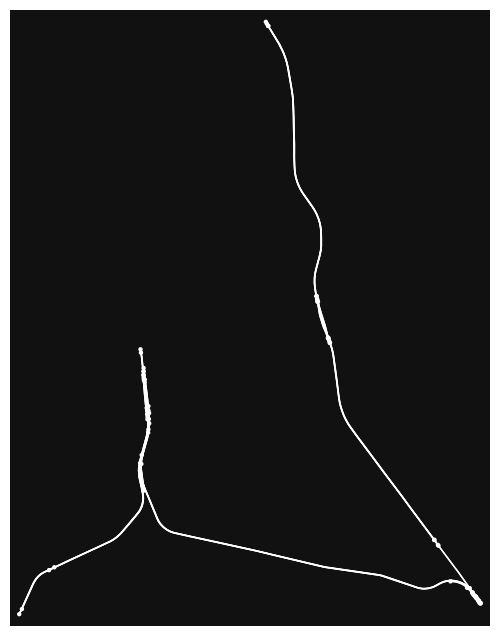

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(G_train, node_size=10, edge_color='white')


#INPUT

In [ ]:
start_location = input("Mau dari Mana? ")
end_location = input("Mau Ke Mana? ")
time_now = input("Jam Berapa Sekarang : HH:MM --> ")


Mau dari Mana? SD Bendungan Hilir
Mau Ke Mana? Sekolah Kristen Calvin SD-SMP-SMA
Jam Berapa Sekarang : HH:MM --> 09:30


# MODA GOJEK

In [ ]:
from geopy.distance import geodesic

def get_nearest_osm_node(graph, location_name):
    """Get nearest OSM node to a geocoded location"""
    coord = ox.geocode(location_name)
    node = ox.distance.nearest_nodes(graph, coord[1], coord[0])
    return node, coord

def calculate_drive_cost_km(distance_km):
    return 3000 * distance_km

def compute_distance_km(graph, path):
    dist = 0
    for i in range(len(path) - 1):
        dist += graph[path[i]][path[i+1]][0]['length'] / 1000  # in km
    return dist

# Load graph jalan
G_drive = ox.graph_from_place("Jakarta Pusat, Indonesia", network_type='drive')

# Cari node OSM terdekat


In [ ]:
def Gojek_mode(start_location, end_location):
  start_node, start_coord = get_nearest_osm_node(G_drive, start_location)
  end_node, end_coord = get_nearest_osm_node(G_drive, end_location)

  # Path shortest drive
  drive_path = nx.shortest_path(G_drive, start_node, end_node, weight='length')
  drive_distance = compute_distance_km(G_drive, drive_path)
  drive_money = calculate_drive_cost_km(drive_distance)
  average_speed_kmh = 30  # misal 30 km/jam
  drive_time = drive_distance / average_speed_kmh * 60  # in minutes

  print("🚗 DRIVE ONLY MODE")
  print("Total distance:", round(drive_distance, 2), "km")
  print("Money cost:", int(drive_money), "IDR")
  print("Estimated time (without waiting):", round(drive_time, 1), "minutes")
  print("Drive Path:")
  print(start_location)
  for node in drive_path:
      print(node, end="\n")
  print(end_location)

  src = get_building_node_id_by_name(start_location)
  dst = get_building_node_id_by_name(end_location)

  path = nx.dijkstra_path(G, source=src, target=dst, weight='length')
  path_edges = list(zip(path, path[1:]))
  total_dist = nx.shortest_path_length(G, source=src, target=dst, weight='length')

  # Build GeoDataFrame for path edges
  lines = []
  for u, v in path_edges:
      x1, y1 = G.nodes[u]['x'], G.nodes[u]['y']
      x2, y2 = G.nodes[v]['x'], G.nodes[v]['y']
      lines.append(LineString([(x1, y1), (x2, y2)]))
  gdf_path = gpd.GeoDataFrame(geometry=lines, crs="EPSG:4326")

  # 4. Plot
  ax = gdf_edges.plot(figsize=(12,12), linewidth=0.5, edgecolor='gray')
  gdf_nodes.plot(ax=ax, markersize=10, color='orange', marker = 'o', label = 'Intersections')
  gdf_bld.plot(ax=ax, markersize=50, color='blue', marker='o', label='POI Buildings')
  gdf_path.plot(ax=ax, linewidth=3, color='black', label='Shortest Path (Distance Cost)')

  plt.legend()
  plt.title(f"Shortest path from '{src_name}' to '{dst_name}' ({total_dist:.1f} m)")
  plt.axis('off')
  plt.show()

  # Print route details
  print("Route:", path_edges)


🚗 DRIVE ONLY MODE
Total distance: 10.42 km
Money cost: 31260 IDR
Estimated time (without waiting): 20.8 minutes
Drive Path:
SD Bendungan Hilir
316452676
4918088420
316452628
309937327
4918088535
4918088543
4918088550
1272318724
309937323
7588383627
6508534350
321929549
4466359827
4464982059
5668480008
9010093830
103353816
4488083662
186790035
4464981824
4464981826
4518625492
4518625387
6859171539
4464981647
4836555975
4476152431
5671317499
4488259486
4476152430
7062375566
186669834
315469626
315469600
29938988
191578995
6315609717
191407012
353574077
1249723074
7225096520
315480467
6315603275
104369586
11076463250
11395329908
5680696059
11542695776
104367971
4548266959
4548266955
7061524312
315747151
315747403
4912042180
315710816
4996688467
315710815
4925793640
2363808932
315710860
6907592438
315711023
1693000683
2032758147
11237718531
2032769772
5670912868
12747919971
2032758084
318538442
6333360282
318538399
Sekolah Kristen Calvin SD-SMP-SMA


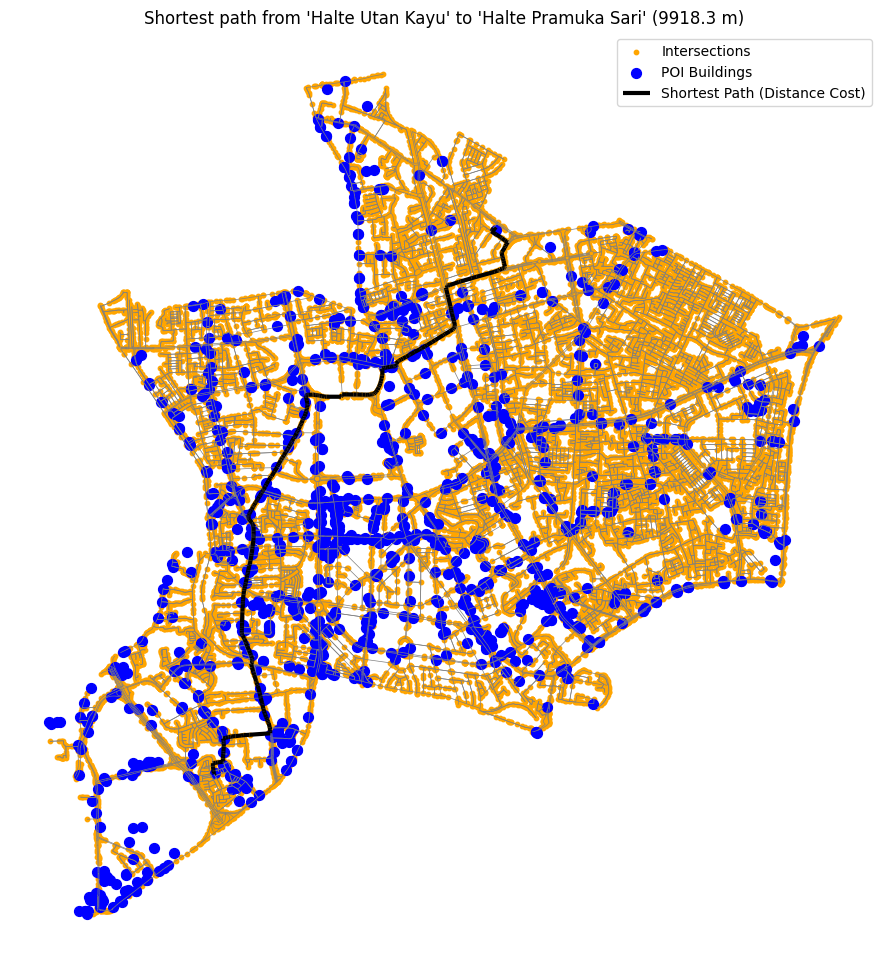

Route: [('bldg_0', 6334665122), (6334665122, 309937111), (309937111, 7244371454), (7244371454, 309937051), (309937051, 9593993026), (9593993026, 309937112), (309937112, 4886739545), (4886739545, 309937113), (309937113, 7115487737), (7115487737, 11307657129), (11307657129, 316452637), (316452637, 9694808440), (9694808440, 309937735), (309937735, 7096432786), (7096432786, 316452639), (316452639, 316452640), (316452640, 316452642), (316452642, 6334668225), (6334668225, 6334668226), (6334668226, 9752265493), (9752265493, 7103158711), (7103158711, 316452643), (316452643, 6334850315), (6334850315, 309937737), (309937737, 7096422978), (7096422978, 7096422980), (7096422980, 309937738), (309937738, 3426186356), (3426186356, 316452705), (316452705, 4867479553), (4867479553, 316452707), (316452707, 4867479552), (4867479552, 4867479551), (4867479551, 316452708), (316452708, 8482695222), (8482695222, 316452709), (316452709, 9694710035), (9694710035, 316452710), (316452710, 12032748428), (1203274842

In [ ]:
Gojek_mode(start_location, end_location)

# MODA BUS

In [ ]:
def connect_pois_to_road_graph(G, pois_df, max_distance_m=100):
    """
    Sambungkan semua POI (misal bus stop) ke graf jalan G dengan edge ke node jalan terdekat.
    """
    G_aug = G.copy()

    for idx, row in pois_df.iterrows():
        lat, lon = row['latitude'], row['longitude']
        name = row['name']

        # Cari node jalan terdekat
        try:
            nearest_node = ox.distance.nearest_nodes(G, lon, lat)
        except Exception as e:
            print(f"Gagal menemukan node terdekat untuk {name}: {e}")
            continue

        # Buat node baru untuk POI (misalnya: "poi_Grand Sahid")
        poi_node = f"poi_{name.strip().replace(' ', '_')}_{idx}"
        G_aug.add_node(poi_node, x=lon, y=lat, name=name, poi=True)

        # Hitung jarak geodesik
        nearest_lat = G.nodes[nearest_node]['y']
        nearest_lon = G.nodes[nearest_node]['x']
        dist_m = geodesic((lat, lon), (nearest_lat, nearest_lon)).meters

        if dist_m <= max_distance_m:
            G_aug.add_edge(poi_node, nearest_node, length=dist_m, weight=dist_m)
            G_aug.add_edge(nearest_node, poi_node, length=dist_m, weight=dist_m)

    return G_aug


In [ ]:
G_road = ox.graph_from_place("Jakarta Pusat, Indonesia", network_type="drive")


In [ ]:
def connect_pois_to_road_graph(G, pois_df, max_distance_m=500):
    G_aug = G.copy()

    for idx, row in pois_df.iterrows():
        lat, lon = row['latitude'], row['longitude']
        name = row['name']

        try:
            nearest_node = ox.distance.nearest_nodes(G, lon, lat)
        except Exception as e:
            print(f"Gagal menemukan node terdekat untuk {name}: {e}")
            continue

        poi_node = f"poi_{name.strip().replace(' ', '_')}_{idx}"
        G_aug.add_node(poi_node, x=lon, y=lat, name=name, poi=True)

        nearest_lat = G.nodes[nearest_node]['y']
        nearest_lon = G.nodes[nearest_node]['x']
        dist_m = geodesic((lat, lon), (nearest_lat, nearest_lon)).meters

        if dist_m <= max_distance_m:
            G_aug.add_edge(poi_node, nearest_node, length=dist_m, weight=dist_m)
            G_aug.add_edge(nearest_node, poi_node, length=dist_m, weight=dist_m)

    return G_aug


In [ ]:
bus_stops = data[data["tag"] == "bus_stop"].copy()
G_augmented = connect_pois_to_road_graph(G_road, bus_stops)


In [ ]:
from geopy.distance import geodesic
import networkx as nx
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import osmnx as ox

def get_nearest_bus_stop_node(coord, bus_stops, G_aug):
    """
    Temukan halte terdekat dari koordinat (lat, lon), return nama node halte ('poi_...')
    """
    min_dist = float('inf')
    nearest_node = None
    for idx, row in bus_stops.iterrows():
        halte_node = f"poi_{row['name'].strip().replace(' ', '_')}_{idx}"
        if halte_node in G_aug.nodes:
            halte_coord = (row['latitude'], row['longitude'])
            dist = geodesic(coord, halte_coord).km
            if dist < min_dist:
                min_dist = dist
                nearest_node = halte_node
    return nearest_node, min_dist

def shortest_bus_path(start_location, end_location, time_str, G_aug, bus_stops):
    """
    Hitung rute bus terpendek dari lokasi awal ke akhir melalui halte terdekat,
    dan tampilkan rutenya dengan visualisasi graf OSMnx.
    """
    # Step 1: Geocode lokasi awal dan akhir
    start_coord = ox.geocode(start_location)
    end_coord = ox.geocode(end_location)

    # Step 2: Cari halte terdekat dari lokasi awal dan akhir
    node_start, dist_start = get_nearest_bus_stop_node(start_coord, bus_stops, G_aug)
    node_end, dist_end = get_nearest_bus_stop_node(end_coord, bus_stops, G_aug)

    if node_start is None or node_end is None:
        return {"error": "Tidak ditemukan halte terdekat dari salah satu lokasi."}

    # Step 3: Cari shortest path antar halte
    try:
        path = nx.shortest_path(G_aug, source=node_start, target=node_end, weight='length')
        dist_km = sum(
            G_aug[path[i]][path[i+1]][0]['length'] for i in range(len(path)-1)
        ) / 1000  # meter → kilometer
    except Exception as e:
        return {"error": f"Gagal mencari path antar halte: {e}"}

    # Step 4: Hitung waktu dan arrival
    speed_kmh = 25
    time_min = dist_km / speed_kmh * 60
    start_time = datetime.strptime(time_str, "%H:%M")
    arrival_time = start_time + timedelta(minutes=time_min)

    # Step 5: Visualisasi
    fig, ax = ox.plot_graph_route(
        G_aug,
        path,
        route_color='red',
        route_linewidth=3,
        node_size=10,
        node_color='blue',
        edge_color='gray',
        bgcolor='white',
        show=False,
        close=False
    )
    plt.title("🚌 Rute Bus Terpendek")
    plt.show()

    # Step 6: Kembalikan hasil
    readable_path = [G_aug.nodes[n].get("name", str(n)) for n in path]

    return {
        "path": readable_path,
        "distance_km": round(dist_km, 2),
        "cost_money": 3500,
        "travel_time_min": round(time_min, 1),
        "arrival_time": arrival_time.strftime("%H:%M")
    }


In [ ]:
def busMode(start_location, end_location, time_now, G_augmented, bus_stops):



  result = shortest_bus_path(start_location, end_location, time_now, G_augmented, bus_stops)




  print(result)
  arrival_time = result['arrival_time']
  travel_time = result['travel_time_min']
  distances_bus = result['distance_km']
  cost_money = result['cost_money']
  path = result['path']
  for node in path:
    print(node, end="\n")
  print(f'Arrival Time : {arrival_time}')
  print(f'Travel Time : {travel_time} minutes')
  print(f'Distance : {distances_bus} km')
  print(f'Cost : {cost_money}')

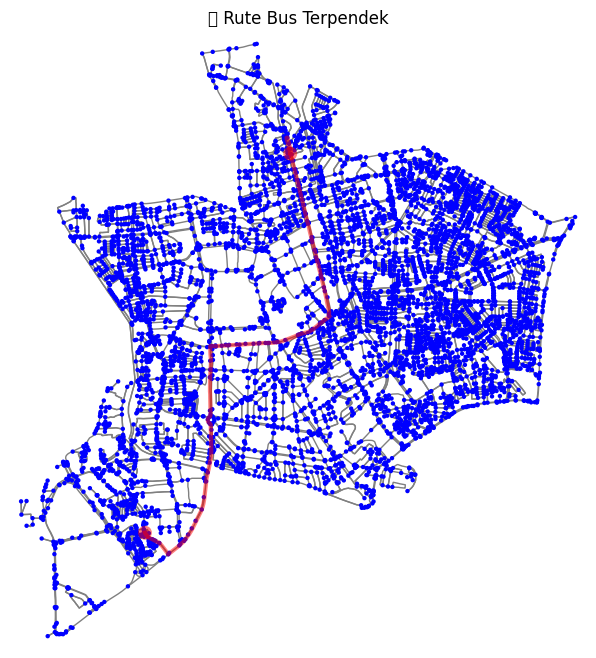

{'path': ['Jln. Bendungan Hilir Gg. IV', '309937041', '316452628', '309937327', '4918088535', '4918088543', '4918088550', '1272318724', '309937323', '7588383627', '6508534350', '321929549', '4466359827', '4464982059', '5668480008', '9010093830', '103353816', '4488083662', '186790035', '4464981824', '4464981826', '4518625492', '4518625387', '6859171539', '4464981647', '4836555975', '4476152431', '5671317499', '4488259486', '4476152430', '7062375566', '186669834', '315469626', '315469600', '29938988', '191578995', '6315609717', '191407012', '353574077', '1249723074', '7225096520', '315480467', '6315603275', '104369586', '11076463250', '11395329908', '5680696059', '11542695776', '104367971', '4548266959', '4548266955', '7061524312', '315747151', '315747403', '4912042180', '315710816', '4996688467', '315710815', '4925793640', '2363808932', '315710860', '6907592438', '315711023', '1693000683', '9243473348', '5984694496', '5984694495', '1675425882', '5668151294', '4963127289', 'Seberang Jala

In [ ]:
# start_location = input()
# end_location = input()
# departing_time = input()

busMode(start_location, end_location, time_now, G_augmented, bus_stops)
# result = shortest_bus_path(start_location, end_location, time_now, G_augmented, bus_stops)
# print(result)
# arrival_time = result['arrival_time']
# travel_time = result['travel_time_min']
# distances_bus = result['distance_km']
# cost_money = result['cost_money']
# path = result['path']
# for node in path:
#   print(node, end="\n")
# print(f'Arrival Time : {arrival_time}')
# print(f'Travel Time : {travel_time} minutes')
# print(f'Distance : {distances_bus} km')
# print(f'Cost : {cost_money}')

In [1]:
pip install -U "huggingface_hub[cli]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.7 MB/s eta 0:00:00


In [3]:
from huggingface_hub import login

login()


In [6]:
from huggingface_hub import upload_file

upload_file(
    path_or_fileobj="Final Project AMDG.ipynb",           # ganti sesuai nama file di Colab
    path_in_repo="Final Project AMDG.ipynb",              # nama di repo (bisa simpan di folder juga)
    repo_id="rvouyaa/MODA",                           # repo milikmu
    repo_type="model"                                 # default untuk file, bukan Space
)


ValueError: Provided path: 'Final Project AMDG.ipynb' is not a file on the local file system